In [65]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

In [66]:
x = [
    [12,39],
    [20,36],
    [28,30],
    [18,52],
    [29,54],
    [33,46],
    [24,55],
    [45,59],
    [45,63],
    [52,70],
    [51,66],
    [52,63],
    [55,58],
    [53,23],
    [55,14],
    [61,8],
    [64,19],
    [69,7],
    [72,24],
]
X = np.array(x)

In [67]:
def get_random_centroids(k):
    centroids={}
    while True:
        ri=np.random.choice(range(len(x)), k)
        #print(ri)
        if len(set(ri))==k:  #found distinct k indexes.
            for i in range(k):
                centroids[i]=x[ri[i]]
            break

    return centroids

In [68]:
k = 3
centroids=get_random_centroids(k)
print(centroids)
c1=centroids[0]
c2=centroids[1]
c3=centroids[2]

{0: [53, 23], 1: [61, 8], 2: [12, 39]}


In [69]:
def euclidianDistance(arr,c):
    return np.sqrt( ((arr[0]-c[0])*(arr[0]-c[0]))+((arr[1]-c[1])*(arr[1]-c[1])) )

In [70]:
def grouping(X):
    g1 = []
    g2 = []
    g3 = []
    sz = len(X)
    #print(sz)
    for i in range(sz):
        data = X[i]
        mn1 = euclidianDistance(data,c1)
        mn2 = euclidianDistance(data,c2)
        mn3 = euclidianDistance(data,c3)
        if mn1<mn2 and mn1<mn3:
            g1.append(data)
        elif mn2<mn1 and mn2<mn3:
            g2.append(data)
        else:
            g3.append(data)
    return g1,g2,g3

In [71]:
def average(grp):
    #GRP = np.array(grp)
    sz = len(grp)
    left=0
    right=0
    #print(sz)
    for i in range(sz):
        t = grp[i] 
        left+=t[0]
        right+=t[1]
    c = [left/sz,right/sz]
    return c

In [72]:
while(1):
    g1,g2,g3 = grouping(x)
    c1 = average(g1)
    c2 = average(g2)
    c3 = average(g3)
    
    g1,g2,g3 = grouping(x)
    c11 = average(g1)
    c22 = average(g2)
    c33 = average(g3)
    
    if c1==c11 and c2==c22 and c3==c33:
        break
print(c1)
print(c2)
print(c3)

[50.0, 63.166666666666664]
[62.333333333333336, 15.833333333333334]
[23.428571428571427, 44.57142857142857]


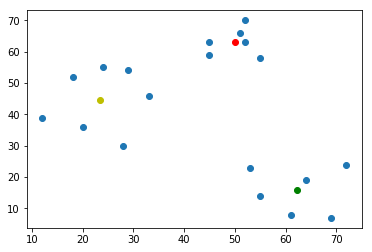

In [73]:
plt.scatter(X[:,0],X[:,1],marker='o' )
colmap = {0: 'r', 1: 'g', 2: 'y', 3:'b'}
plt.scatter(c1[0], c1[1], color=colmap[0]) 
plt.scatter(c2[0], c2[1], color=colmap[1])
plt.scatter(c3[0], c3[1], color=colmap[2])
plt.show()